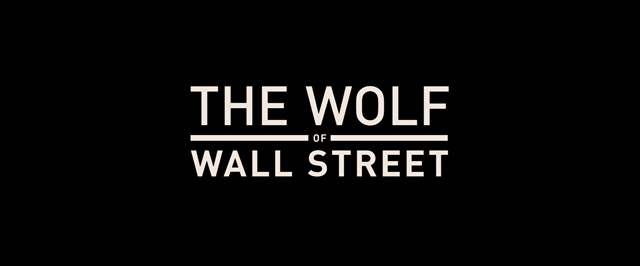

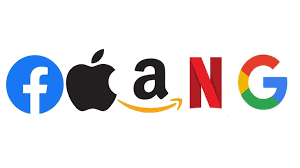

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
import matplotlib.dates as mdates 
yf.pdr_override() 
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')


In [2]:
FAANG_list = ['QQQ', 'FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in FAANG_list:
    globals()[stock] = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
company_list = [QQQ, FB, AAPL, AMZN, NFLX, GOOG]
company_name = ["QQQ Trust", "FACEBOOK", "APPLE", "AMAZON", "NETFLIX", "GOOGLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)


In [4]:
QQQ.describe()

Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean   360.004449  362.683071  357.040119  360.110985  359.040278   
std     23.847610   23.593107   23.764339   23.635796   23.780531   
min    309.970001  312.890015  307.390015  311.329987  309.845581   
25%    339.872498  341.942513  336.934998  340.385002  339.078056   
50%    361.070007  363.195007  358.379990  360.735001  359.461044   
75%    378.707489  380.625008  375.902496  378.917496  377.872536   
max    405.570007  408.709991  402.579987  403.989990  402.981812   

             Volume  
count  2.540000e+02  
mean   5.131757e+07  
std    2.539576e+07  
min    1.933620e+07  
25%    3.296005e+07  
50%    4.336095e+07  
75%    6.506118e+07  
max    1.986858e+08

In [5]:
#FB.describe()

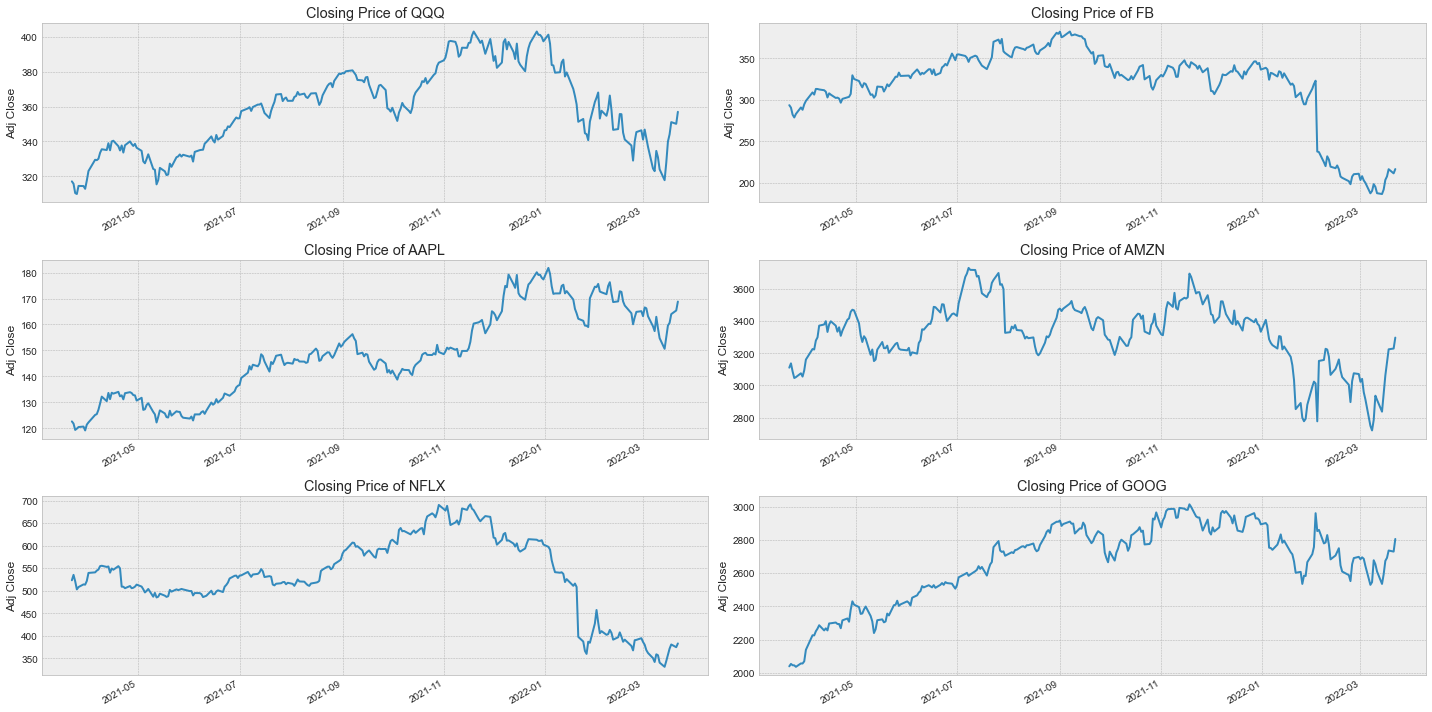

In [6]:
# Closing for QQQ/FAANG
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
#plt.style.use("dark_background")
#plt.style.use("fivethirtyeight")
#plt.style.use('classic')
plt.style.use('bmh')

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {FAANG_list[i - 1]}")
    
plt.tight_layout()

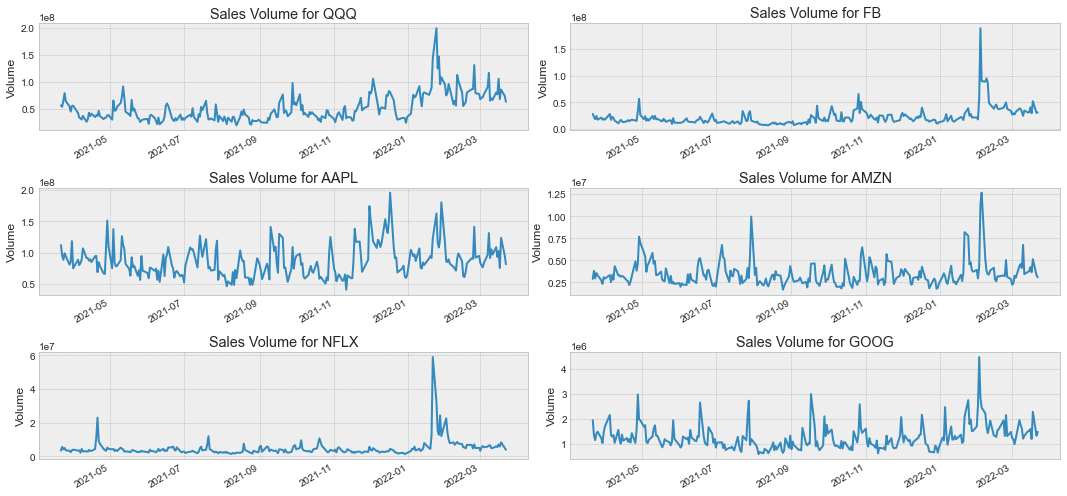

In [7]:
# Total Volume for QQQ/FAANG 
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {FAANG_list[i - 1]}")
    
plt.tight_layout()


In [8]:
# Moving Average 
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

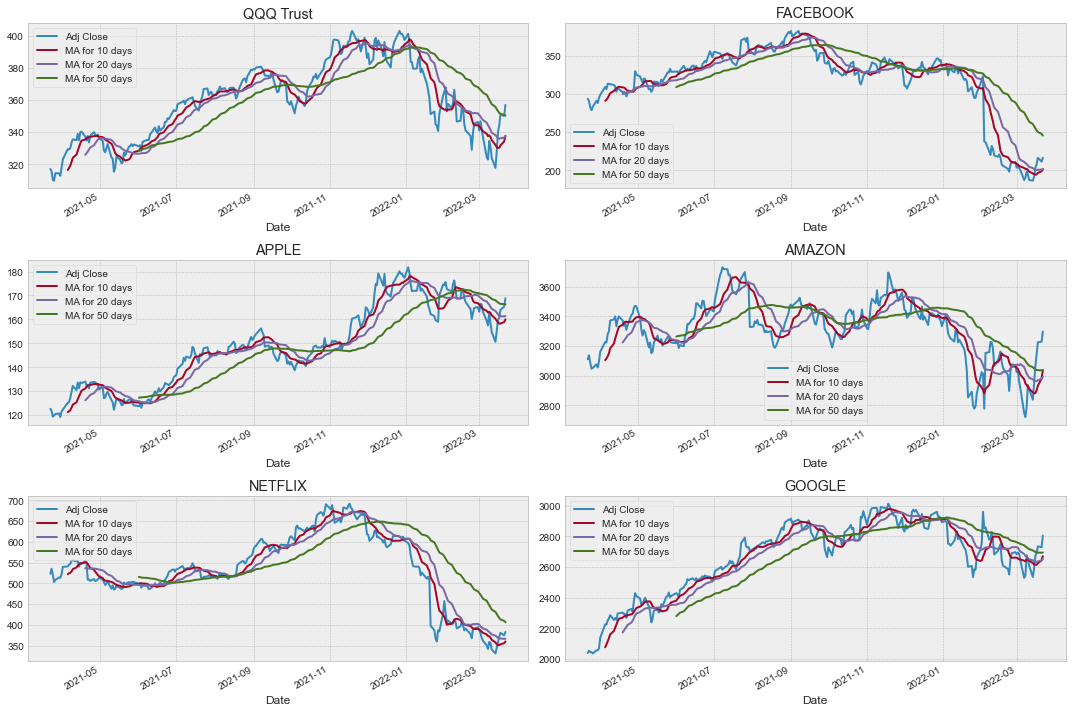

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

QQQ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('QQQ Trust')

FB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('FACEBOOK')

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('APPLE')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('NETFLIX')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('GOOGLE')

fig.tight_layout()



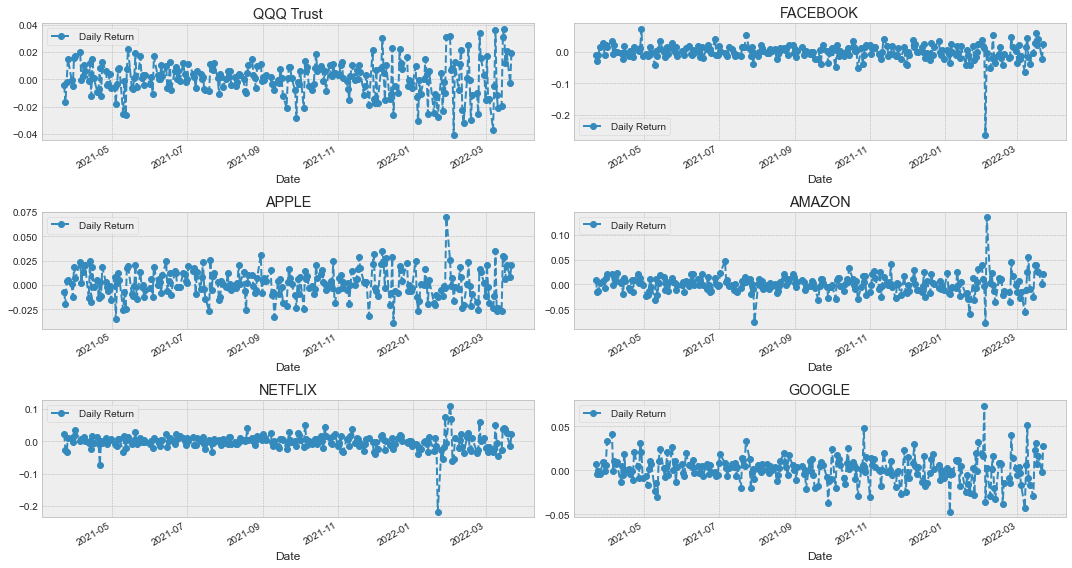

In [10]:
# Percentage (%) Daily return

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

QQQ['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('QQQ Trust')

FB['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('FACEBOOK')

AAPL['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('APPLE')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

NFLX['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('NETFLIX')

GOOG['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('GOOGLE')

fig.tight_layout()


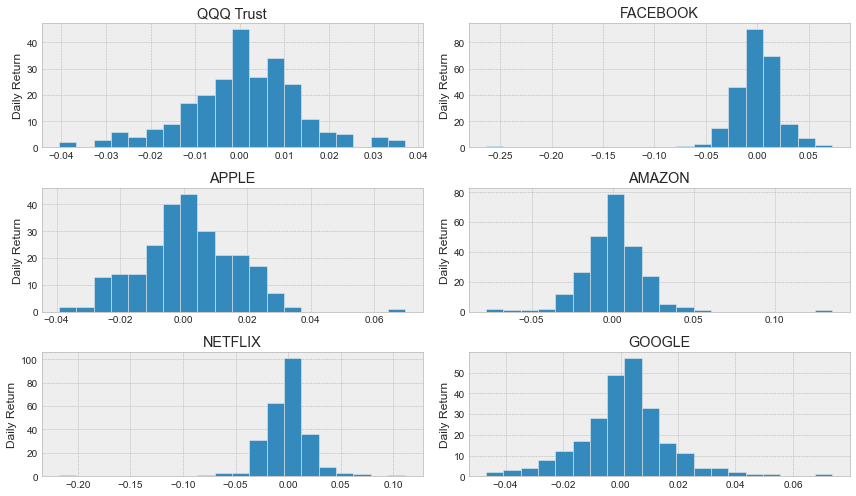

In [11]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=20)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [12]:
# Closing price
closing_df = pdr.get_data_yahoo(FAANG_list, start=start, end=end)['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [13]:
# Daily Returns - Percentage 
tech_rets = closing_df.pct_change()


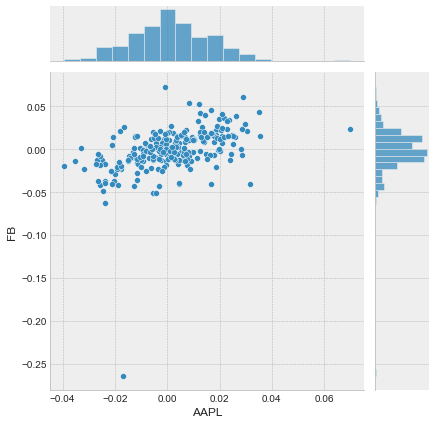

In [14]:
# Daily Return % Relationship between any two FAANG, i.e., APPLE & GOOGLE
sns.jointplot(x='AAPL', y='FB', data=tech_rets, kind='scatter')

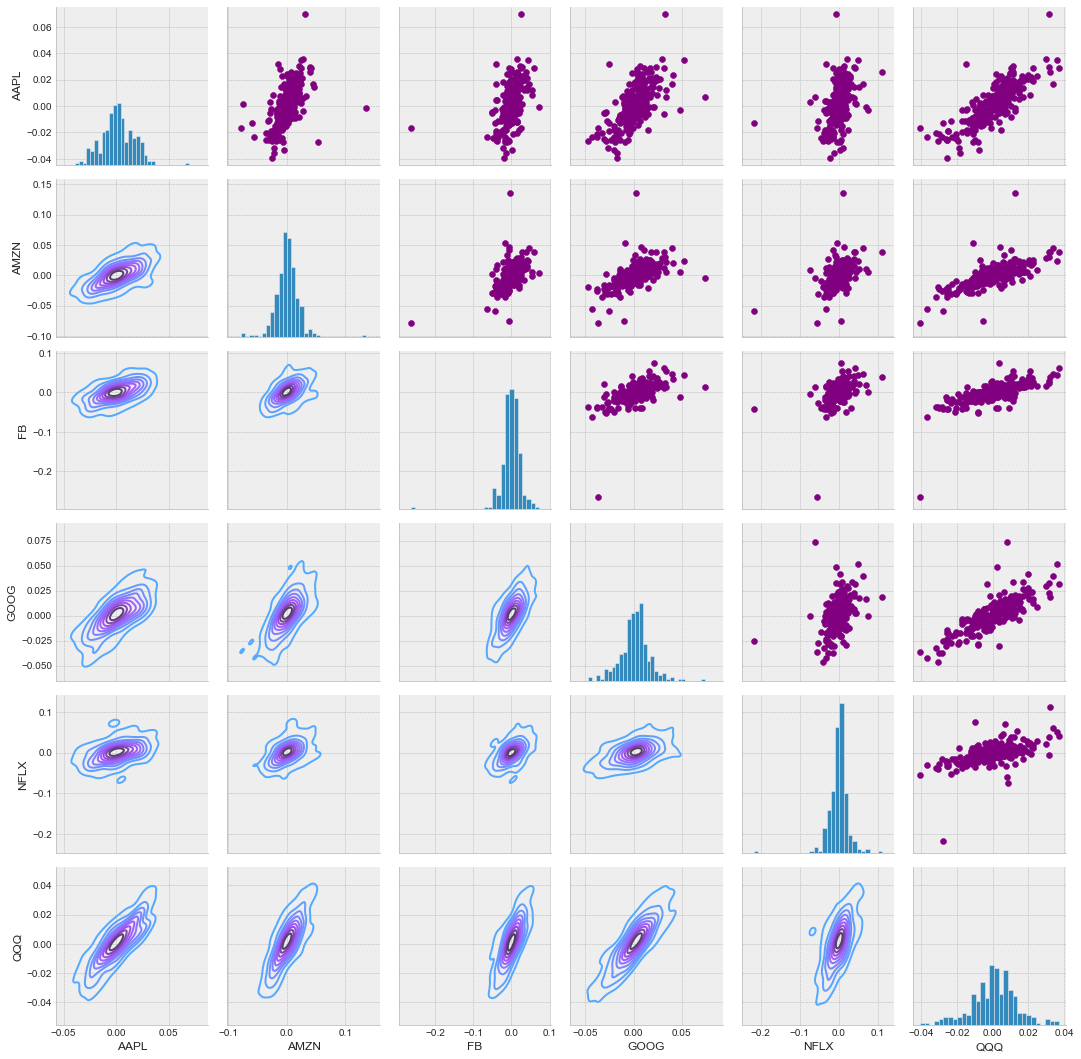

In [15]:
# Daily Return % Relationship FAANG PairPLot 
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d') #Kernel Distribution Estimation Plot
return_fig.map_diag(plt.hist, bins=30)

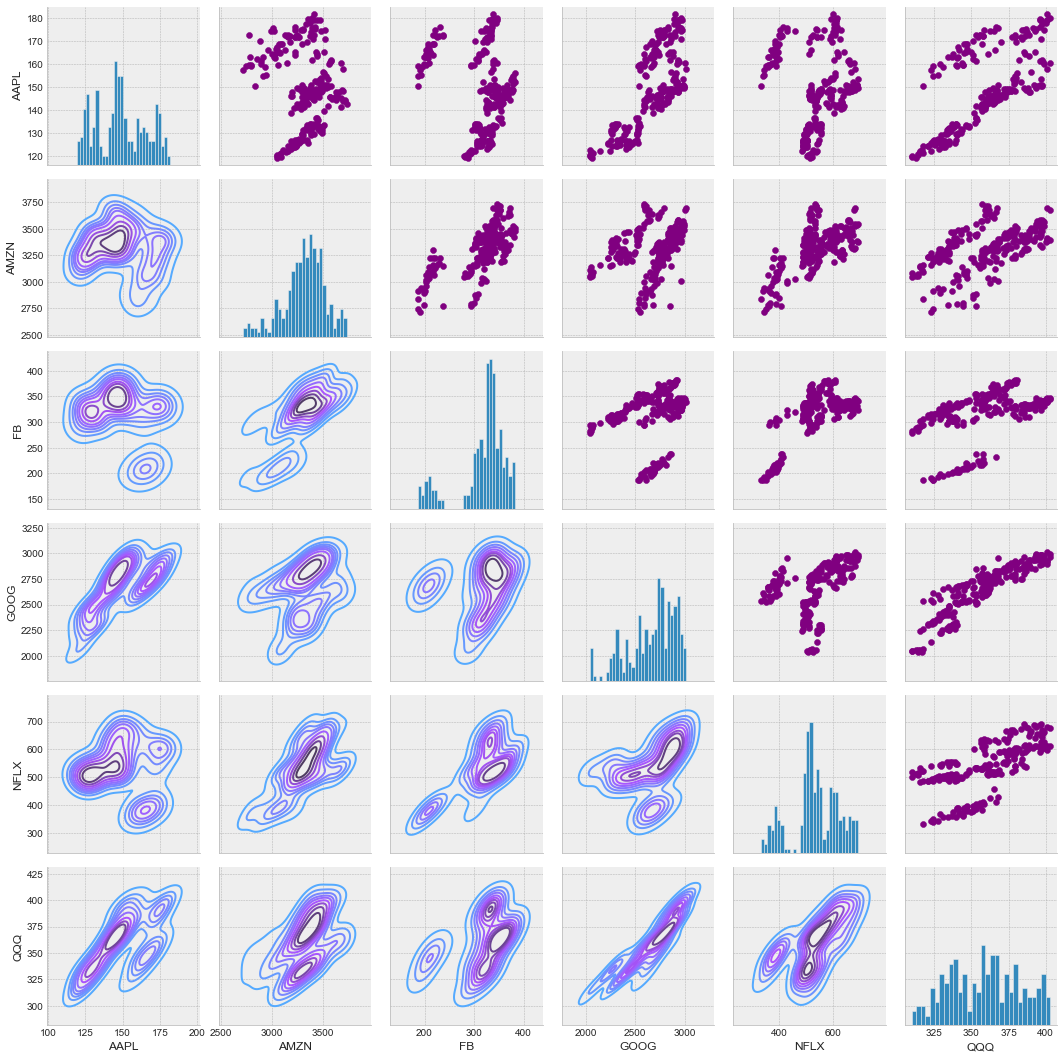

In [16]:
# Closing Price Relationship FAANG PairPLot 
closing_fig = sns.PairGrid(closing_df)
closing_fig.map_upper(plt.scatter,color='purple')
closing_fig.map_lower(sns.kdeplot,cmap='cool_d')
closing_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

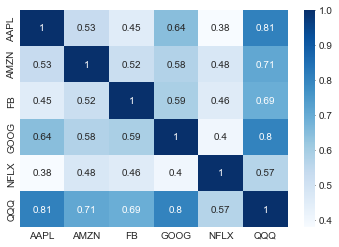

In [17]:
# Daily Returns % correlation FAANG 
sns.heatmap(tech_rets.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

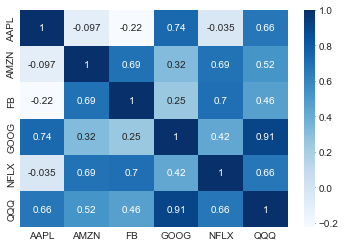

In [18]:
# Closing Price correlation FAANG 
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')

In [19]:
#AAPL.head()

In [20]:
# INDIVIDUAL FAANG STOCK ANALYSIS --- QQQ 

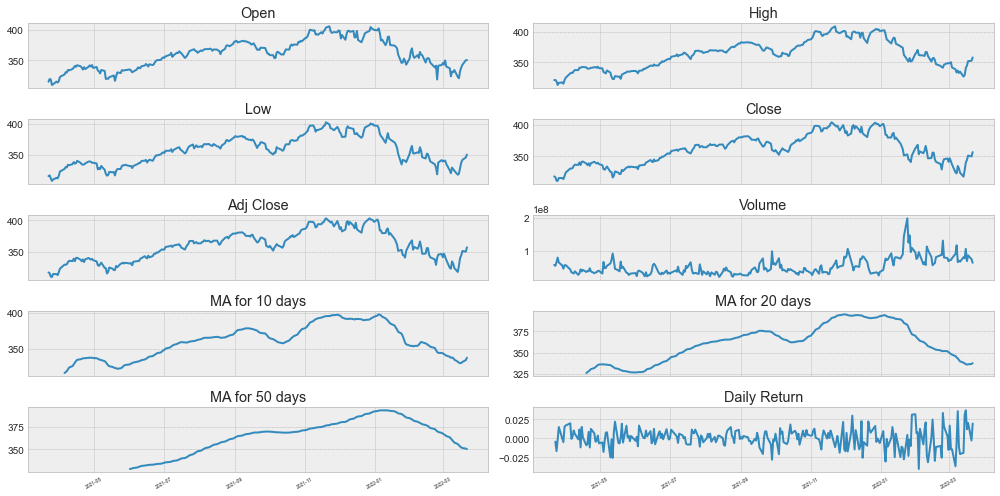

In [21]:
df_plot = QQQ.copy()
del df_plot['company_name']
list_length = df_plot.shape[1]
ncols = 2
nrows = int(round(list_length / ncols, 0))

#plt.style.use("dark_background")
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=5, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        plt.ylabel(None)
        plt.xlabel(None)

fig.tight_layout()
plt.show()

In [22]:
# Closing price predition - QQQ 
Ind_stock = DataReader('QQQ', data_source='yahoo', start=start, end=datetime.now())


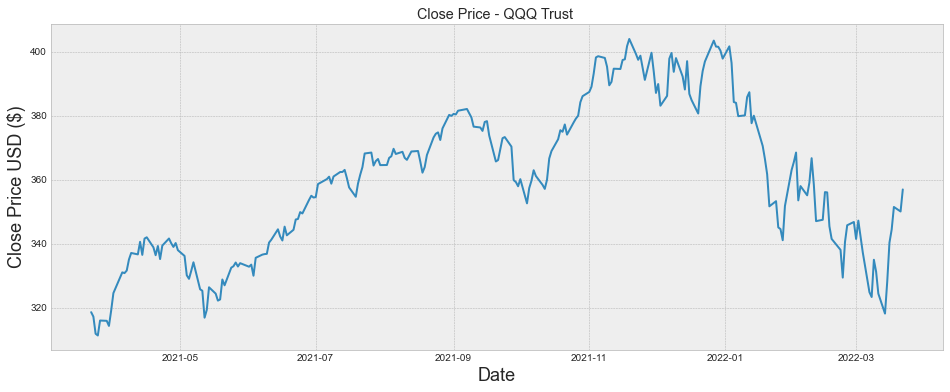

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price - QQQ Trust ')
plt.plot(Ind_stock['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# STOCK MARKET ANALYSIS USING CUFFLINK

In [25]:
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode


In [26]:
cf.go_offline()
init_notebook_mode()

[*********************100%***********************]  1 of 1 completed


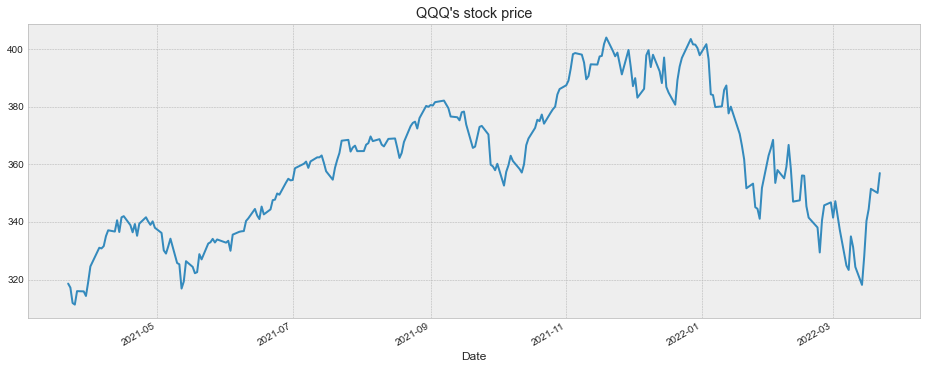

In [27]:
TICKER = "QQQ"

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

df = yf.download(TICKER, 
                 start=start, 
                 end=end)

plt.figure(figsize=(16,6))
df["Close"].plot(title=f"{TICKER}'s stock price");

In [28]:
qf = cf.QuantFig(df, title=f"{TICKER} 365 days stock price", name=TICKER)
qf.iplot()

In [29]:
fig = go.Figure(data=
    [go.Candlestick(x=df.index,
                    open=df["Open"],
                    high=df["High"],
                    low=df["Low"],
                    close=df["Close"])]
)

fig.update_layout(
    title=f"{TICKER}'s adjusted stock price",
    yaxis_title="Price ($)"
)

fig.show()

In [30]:
qf = cf.QuantFig(df, title=f"{TICKER} 356 days stock price", name=TICKER)
qf.add_sma(periods=20, column='Close', color='blue')
qf.iplot()

In [31]:
qf = cf.QuantFig(df, title=f"{TICKER} 356 days stock price", name=TICKER)
qf.add_sma([10, 50], width=2, color=['blue', 'red'])
qf.add_rsi(periods=14, color='green')
qf.add_bollinger_bands(periods=20, boll_std=2 ,colors=['orange','grey'], fill=True)
qf.add_volume()
qf.add_macd()
qf.iplot()

In [32]:
# Forecasting

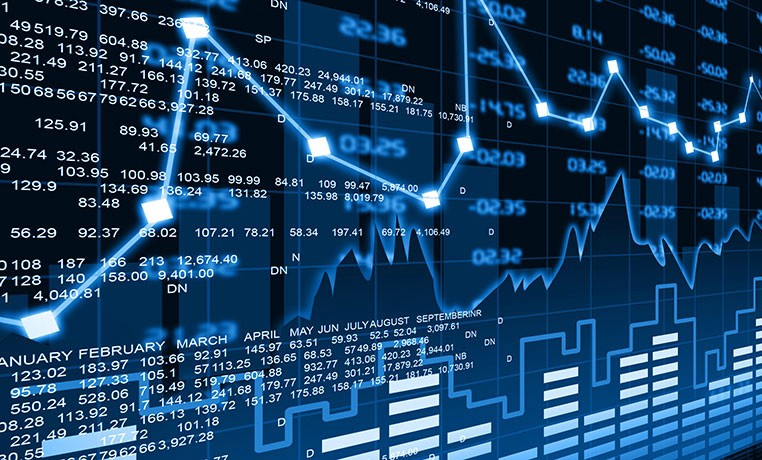

In [33]:
data = Ind_stock.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

242

In [34]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [35]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
            
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-03-22 18:45:56.601690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-22 18:45:56.601955: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2022-03-22 18:45:56.914832: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-22 18:45:57.530943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-22 18:45:57.719554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-22 18:45:57.840854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-22 18:45:57.961223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/182 [..............................] - ETA: 4:10 - loss: 0.3067

2022-03-22 18:45:58.168767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


182/182 [==============================] - 6s 26ms/step - loss: 0.0206


In [37]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2022-03-22 18:46:03.128648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-22 18:46:03.198100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-22 18:46:03.306703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14.071571773625195

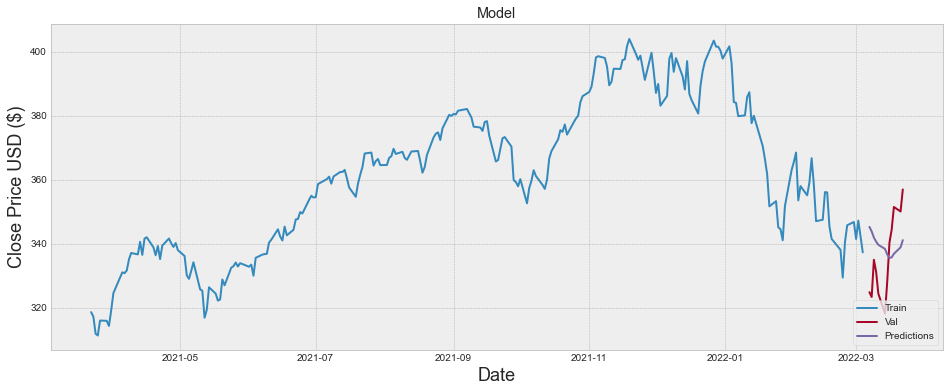

In [38]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
#plt.style.use("dark_background")
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
valid

Close  Predictions
Date                               
2022-03-07  324.859985   345.263611
2022-03-08  323.350006   343.854828
2022-03-09  334.989990   341.918213
2022-03-10  331.269989   340.675446
2022-03-11  324.399994   339.655121
2022-03-14  318.170013   338.384064
2022-03-15  328.149994   336.673889
2022-03-16  340.320007   335.572449
2022-03-17  344.440002   335.734070
2022-03-18  351.489990   336.851868
2022-03-21  350.079987   338.881226
2022-03-22  356.959991   341.120544

In [40]:
# ALGORITHMIC TRADING

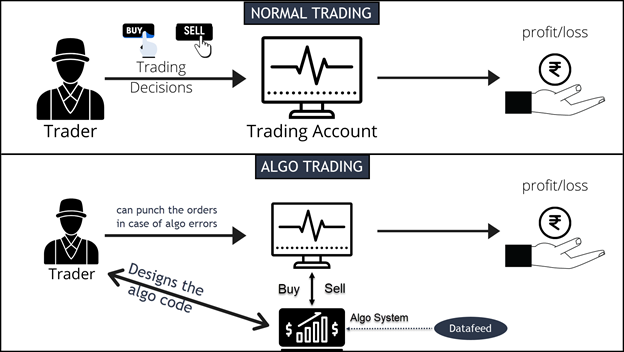

In [41]:
sma10 = pd.DataFrame()
sma10['Adj Close'] = Ind_stock['Adj Close'].rolling(window=10).mean()
#sma10.head(15)

In [42]:
sma20 = pd.DataFrame()
sma20['Adj Close'] = Ind_stock['Adj Close'].rolling(window=20).mean()
#sma20.head(25)

In [44]:
data = pd.DataFrame()
data[TICKER] = Ind_stock['Adj Close']
data['SMA10'] = sma10['Adj Close']
data['SMA20'] = sma20['Adj Close']
data

QQQ       SMA10       SMA20
Date                                          
2021-03-22  317.090851         NaN         NaN
2021-03-23  315.707550         NaN         NaN
2021-03-24  310.383026         NaN         NaN
2021-03-25  309.845612         NaN         NaN
2021-03-26  314.493347         NaN         NaN
...                ...         ...         ...
2022-03-16  339.899780  330.098901  336.451045
2022-03-17  344.014709  330.316632  335.871762
2022-03-18  351.055969  331.733878  336.173387
2022-03-21  350.079987  334.295990  336.622971
2022-03-22  356.959991  337.696915  337.587843

[254 rows x 3 columns]

In [45]:
def buySell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data ['SMA10'][i] > data['SMA20'][i]:
      if flag != 1:
        sigPriceBuy.append(data[TICKER][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA10'][i] < data['SMA20'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data[TICKER][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [46]:
buySell = buySell(data)
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]


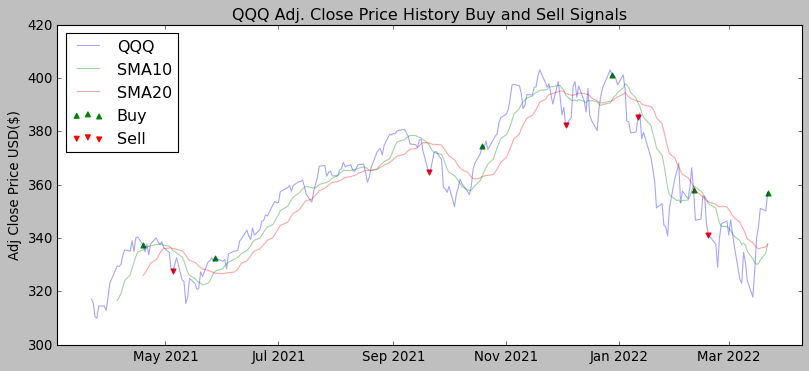

In [47]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(data[TICKER], label=TICKER, alpha=0.35)
plt.plot(data['SMA10'], label='SMA10', alpha=0.35)
plt.plot(data['SMA20'],label='SMA20', alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data.index, data['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title(f'{TICKER} Adj. Close Price History Buy and Sell Signals')
#plt.xlabel("March 23,2020 - March 21,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()

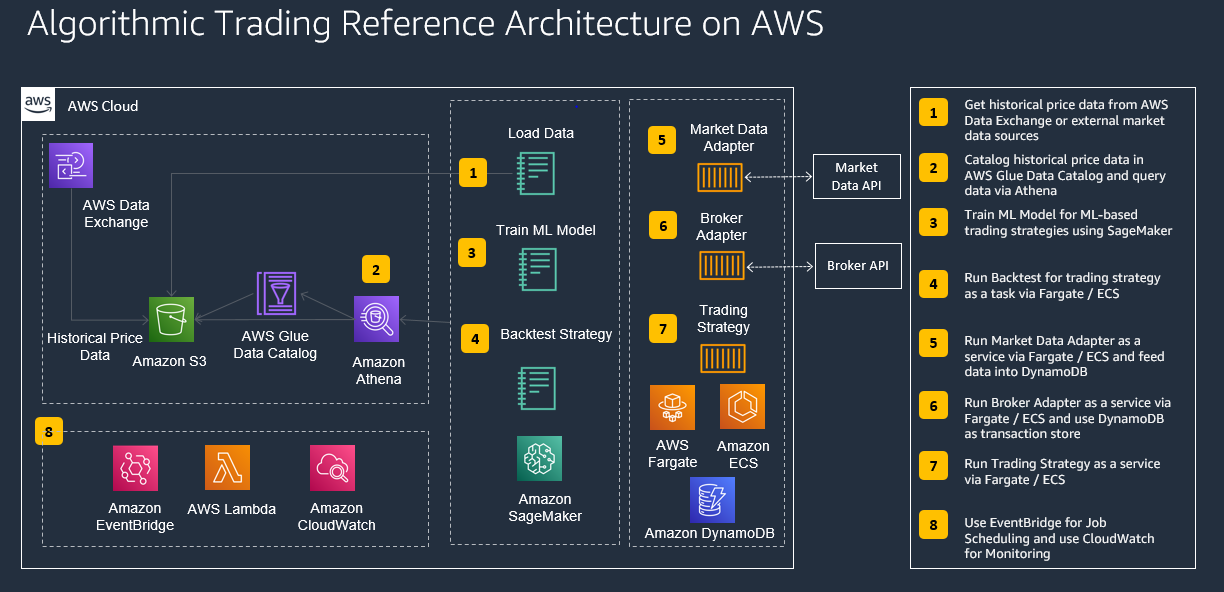